In [ ]:
#Additional Program-1: Time series data analysis
#https://www.geeksforgeeks.org/time-series-data-visualization-in-python/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [ ]:
# reading the dataset using read_csv
df = pd.read_csv("./archive/prices-split-adjusted.csv", parse_dates=True, index_col='date')

# displaying the first five rows of dataset
df.head()


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


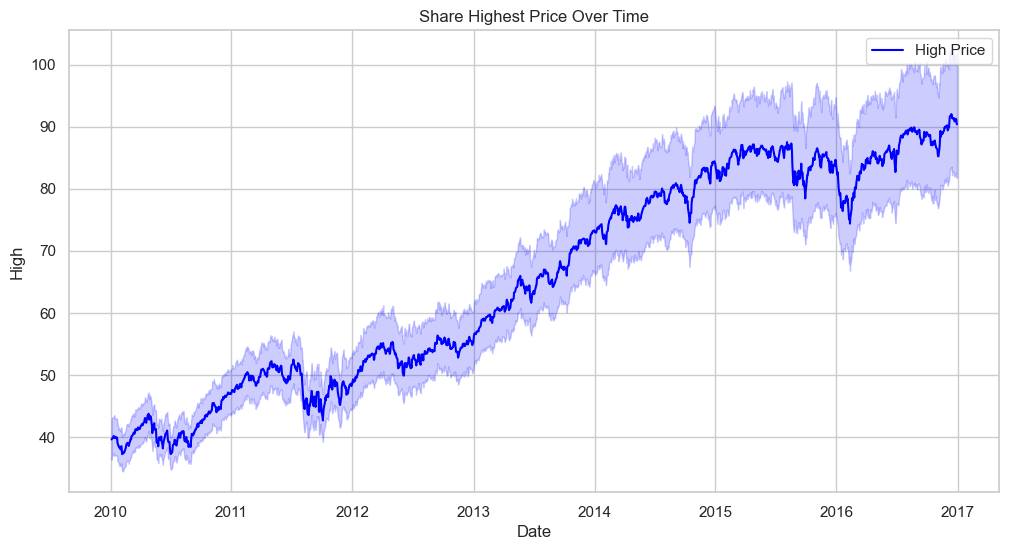

In [ ]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df, x='date', y='high', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()


/var/folders/k_/4w83j7ts3356034lr9_rdrd80000gn/T/ipykernel_1942/1503964715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function


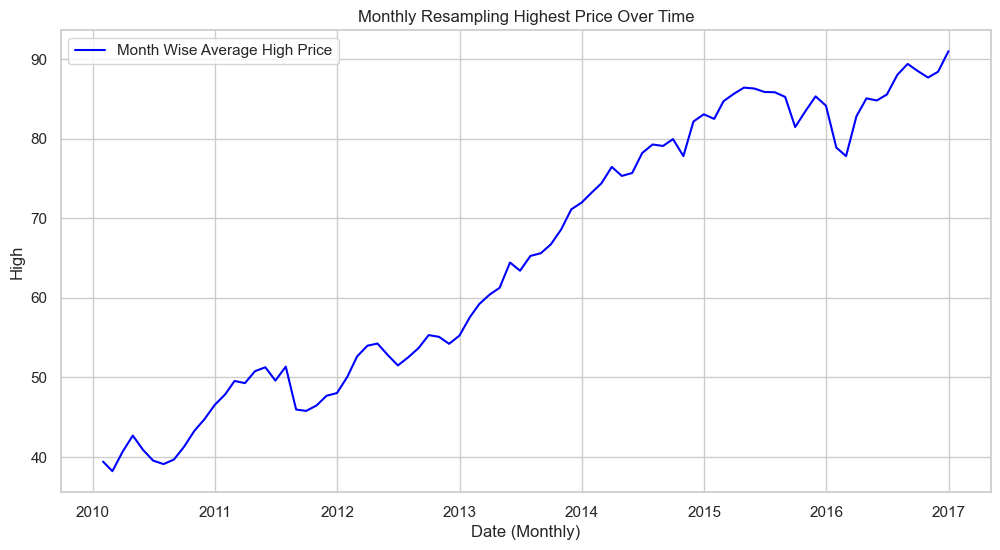

In [ ]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='high', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()


<Figure size 1200x600 with 0 Axes>

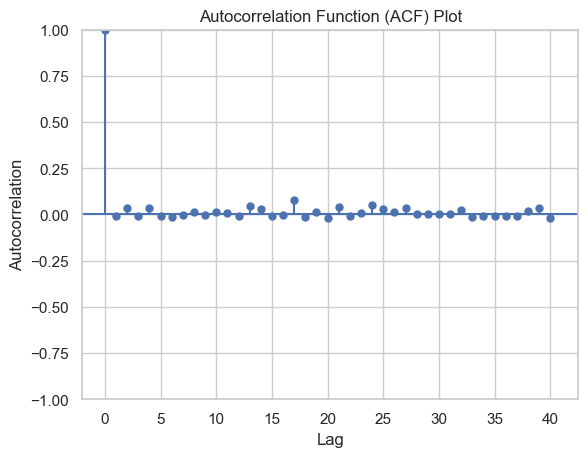

In [ ]:
#Detecting Seasonality Using Auto Correlation
# If 'Date' is a column, but not the index, you can set it as the index
#df.set_index('date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


In [ ]:
#Detecting Stationarity
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


In [ ]:
#Smoothening the data using Differencing and Moving Average
# Differencing
df['high_diff'] = df['high'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['high'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()


In [ ]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()


In [ ]:
#Original Data Vs Differenced Data
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


In [ ]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
